In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
sns.set()
%matplotlib inline

In [2]:
df=sm.datasets.fair.load_pandas().data

In [3]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [4]:
#convert the affairs coloumn into a categorical feature for prediction where 1 represent an affair while 0 represents no affair.
df["affair"]=(df["affairs"]>0).astype(dtype=int)

In [5]:
df["affair"]

0       1
1       1
2       1
3       1
4       1
       ..
6361    0
6362    0
6363    0
6364    0
6365    0
Name: affair, Length: 6366, dtype: int32

In [6]:
df.drop(["affairs"],inplace=True,axis=1)

In [7]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int32  
dtypes: float64(8), int32(1)
memory usage: 422.9 KB


In [9]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


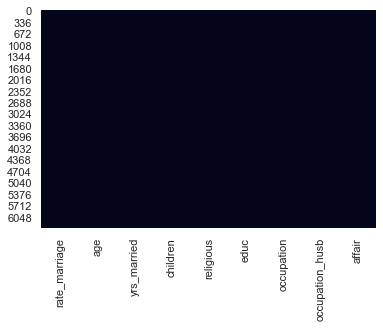

In [10]:
sns.heatmap(df.isnull(),cbar=False)

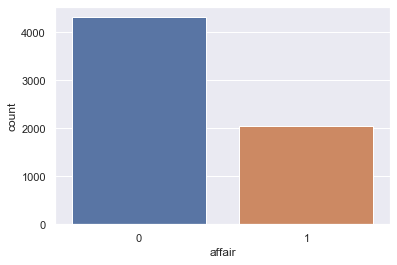

In [11]:
#checking the count of the affair columm
sns.countplot(df["affair"])

In [12]:
df["occupation"].unique()

array([2., 3., 5., 4., 1., 6.])

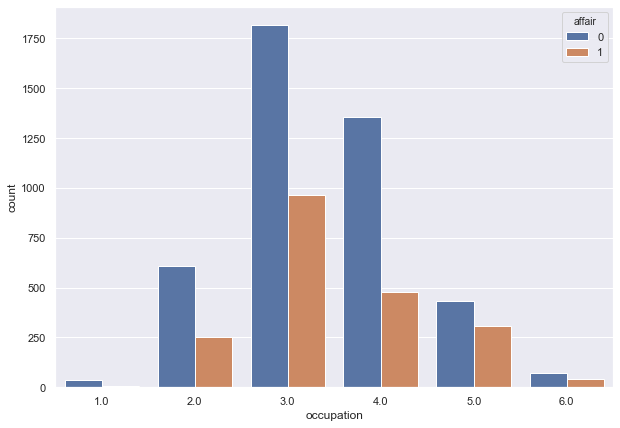

In [13]:
#cheching with respect to occupation of the women what is the count of the affairs they are having
plt.figure(figsize=(10,7))
sns.countplot(df["occupation"],hue=df["affair"])

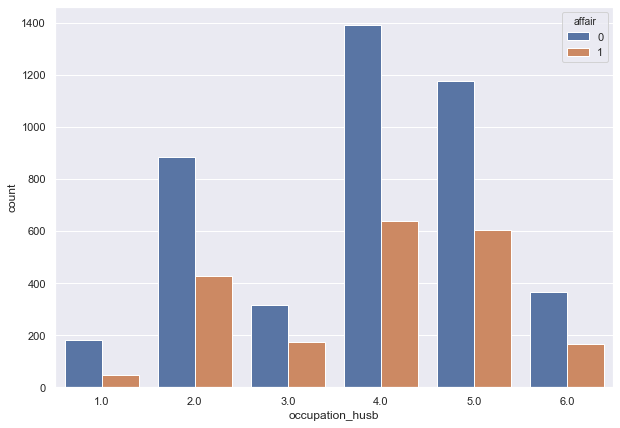

In [14]:
plt.figure(figsize=(10,7))
sns.countplot(df["occupation_husb"],hue=df["affair"])

In [15]:
df["children"].unique()

array([3. , 0. , 4. , 1. , 5.5, 2. ])

In [16]:
df["children"][df["children"]==5.5].value_counts()

5.5    203
Name: children, dtype: int64

In [17]:
df["children"]=df["children"].replace(5.5,5)

In [18]:
df["children"].unique()

array([3., 0., 4., 1., 5., 2.])

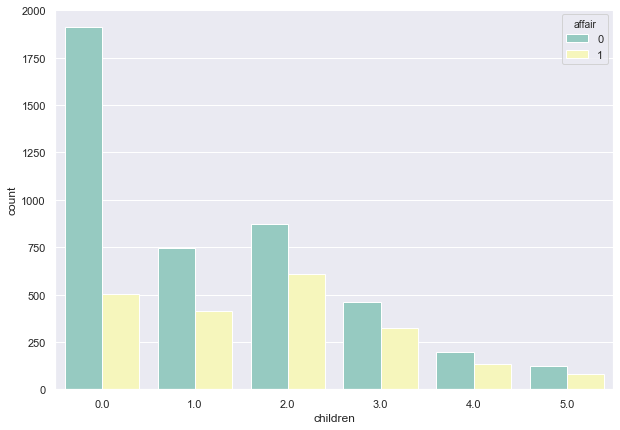

In [19]:
plt.figure(figsize=(10,7))
sns.countplot(df["children"],hue=df["affair"],palette='Set3')

In [20]:
a=(df[(df["children"]==0) & (df["affair"]==1)].count()["age"]/(df["children"]==0).value_counts()[True])*100
b=(df[(df["children"]==1) & (df["affair"]==1)].count()["age"]/(df["children"]==0).value_counts()[True])*100
c=(df[(df["children"]==2) & (df["affair"]==1)].count()["age"]/(df["children"]==0).value_counts()[True])*100
d=(df[(df["children"]==3) & (df["affair"]==1)].count()["age"]/(df["children"]==0).value_counts()[True])*100
e=(df[(df["children"]==4) & (df["affair"]==1)].count()["age"]/(df["children"]==0).value_counts()[True])*100
f=(df[(df["children"]==5) & (df["affair"]==1)].count()["age"]/(df["children"]==0).value_counts()[True])*100

In [21]:
print("based on there particular classes the % has been calulated")
print("-"*100)
print("women who are having 0 child has {}% of having an affair".format(np.round(a,2)))
print("women who are having 1 children has {}% of having an affair".format(np.round(b,2)))
print("women who are having 2 children has {}% of having an affair".format(np.round(c,2)))
print("women who are having 3 children has {}% of having an affair".format(np.round(d,2)))
print("women who are having 4 children has {}% of having an affair".format(np.round(e,2)))
print("women who are having 5 children has {}% of having an affair".format(np.round(f,2)))

based on there particular classes the % has been calulated
----------------------------------------------------------------------------------------------------
women who are having 0 child has 20.8% of having an affair
women who are having 1 children has 17.07% of having an affair
women who are having 2 children has 25.19% of having an affair
women who are having 3 children has 13.3% of having an affair
women who are having 4 children has 5.43% of having an affair
women who are having 5 children has 3.27% of having an affair


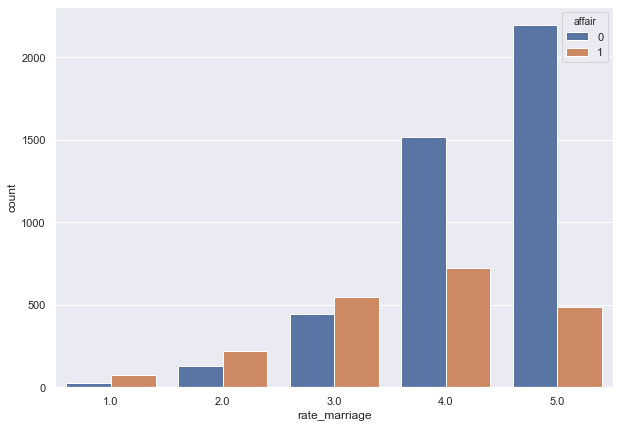

In [22]:
plt.figure(figsize=(10,7))
sns.countplot(x=df["rate_marriage"],hue=df["affair"])

In [23]:
df.age.unique()

array([32. , 27. , 22. , 37. , 42. , 17.5])

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


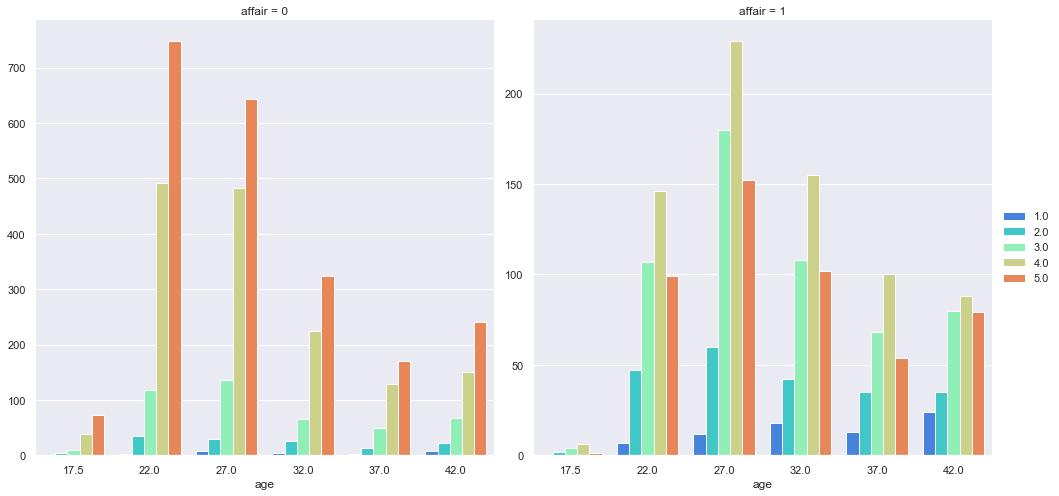

In [24]:
g=sns.FacetGrid(df,col="affair",size=7,sharey=False)
g.map(sns.countplot,"age",hue=df["rate_marriage"],palette="rainbow").add_legend()

In [25]:
df.yrs_married.unique()

array([ 9. , 13. ,  2.5, 16.5, 23. ,  6. ,  0.5])

In [26]:
df["educ"].unique()

array([17., 14., 16., 12., 20.,  9.])

In [27]:
df["religious"].unique()

array([3., 1., 2., 4.])

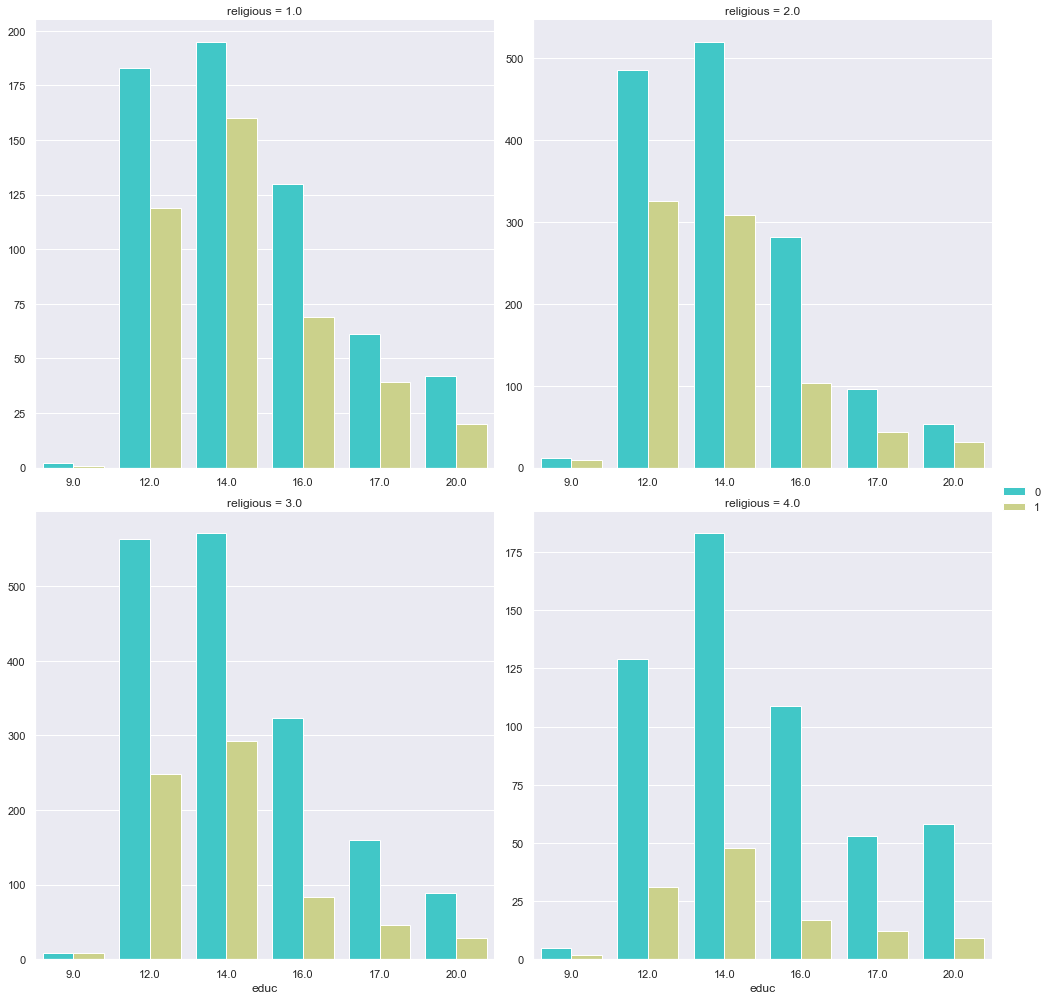

In [28]:
g=sns.FacetGrid(df,col="religious",height=7,col_wrap=2,sharex=False,sharey=False)
g.map(sns.countplot,"educ",hue=df["affair"],palette="rainbow").add_legend()

In [29]:
c=pd.get_dummies(df["occupation"],prefix="occ",prefix_sep="_",drop_first=True)

In [30]:
c.head()

,occ_2.0,occ_3.0,occ_4.0,occ_5.0,occ_6.0
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0


In [31]:
d=pd.get_dummies(df["occupation_husb"],prefix="occ_h",drop_first=True)

In [32]:
d.head()

,occ_h_2.0,occ_h_3.0,occ_h_4.0,occ_h_5.0,occ_h_6.0
0,0,0,0,1,0
1,0,0,1,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,1,0,0


In [33]:
r=pd.get_dummies(df["religious"],prefix="religious",drop_first=True)

In [34]:
rm=pd.get_dummies(df["rate_marriage"],prefix="rate_m",drop_first=True)

In [35]:
rm.head()

,rate_m_2.0,rate_m_3.0,rate_m_4.0,rate_m_5.0
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,0,1


In [36]:
df.drop(["religious","rate_marriage","occupation","occupation_husb"],inplace=True,axis=1)

In [37]:
df.head()

,age,yrs_married,children,educ,affair
0,32.0,9.0,3.0,17.0,1
1,27.0,13.0,3.0,14.0,1
2,22.0,2.5,0.0,16.0,1
3,37.0,16.5,4.0,16.0,1
4,27.0,9.0,1.0,14.0,1


In [38]:
df=pd.concat([c,d,r,rm,df],axis=1)

In [39]:
df.head()

,occ_2.0,occ_3.0,occ_4.0,occ_5.0,occ_6.0,occ_h_2.0,occ_h_3.0,occ_h_4.0,occ_h_5.0,occ_h_6.0,...,religious_4.0,rate_m_2.0,rate_m_3.0,rate_m_4.0,rate_m_5.0,age,yrs_married,children,educ,affair
0,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,32.0,9.0,3.0,17.0,1
1,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,27.0,13.0,3.0,14.0,1
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,22.0,2.5,0.0,16.0,1
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,37.0,16.5,4.0,16.0,1
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,27.0,9.0,1.0,14.0,1


In [40]:
X=df.iloc[:,:-1]

In [41]:
y=df["affair"]

In [42]:
st=StandardScaler()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [44]:
X_train=st.fit_transform(X_train)

In [45]:
X_test=st.transform(X_test)

In [46]:
model=LogisticRegression()

In [47]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
y_pred=model.predict(X_test)

In [49]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [50]:
c=confusion_matrix(y_true=y_test,y_pred=y_pred)

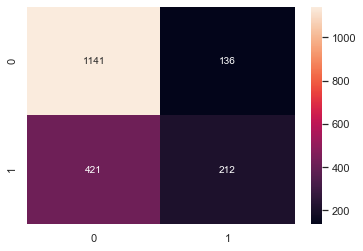

In [51]:
sns.heatmap(c,annot=True,fmt="1g")

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80      1277
           1       0.61      0.33      0.43       633

    accuracy                           0.71      1910
   macro avg       0.67      0.61      0.62      1910
weighted avg       0.69      0.71      0.68      1910

